# INDIA FLIGHT PRICE PREDICTION

# INTRODUCTION
* To predict the price of the flight with different features.
* To analyse the data insight about the filght companies and flight type.
* This data is an clean data took from the kaggle which was scraped from easemytrip.com .
* This data consist of 300152 datapoints.
* This dataset consist of 6 big flight companies and flights between 6 big cites in india.

# FEATURES OF THE DATASET
* AIRLINE: The name of the a company.
* FLIGHT: The flight code given by the company. 
* SOURCE_CITY: Take off point of the flight.
* DEPARTURE_TIME: Time period of the departure ex(morning, evening).
* STOPS: Number of stop points between source and destination categorised into one ,two and two or more.
* ARRVAL_TIME: Same as departure time the time period of arrival time of the flight.
* DESTINATION_CITY: Landing place of the flight.
* CLASS: Categorical data about whether the flight is economy or business.
* DURATION: Time taken for the travel.
* DAYS_LEFT: Day's between the departure and booking.
* PRICE: Cost the ticket in rupees

* IMPORTING IMPORTANT LIBRARIES

In [39]:
# importing pandas for manipulating the data.
import pandas as pd
# importing numpy for linear algebra and dataframe iteration.
import numpy as np
# importing matplotlib for data visualization.
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score


In [4]:
df = pd.read_csv("D:\data_science\Flight_price_prediction\Clean_Dataset.csv\Clean_Dataset.csv")

In [5]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


* we have converted the data from csv format to dataframe.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


* from this information we can say:
    * this data contains 12 columns and 300153 rows
    * there is no null value in this dataset
    * we don't need the unamed column 0

In [7]:

df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [8]:
# we don't need this column so we are dropping it.
df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


* We have 10 colums and 300153 rows in our dataset
* The dataset is already clean.
* "Price" column is the target variable and its dtype is in int 

# EDA

* AVERAGE PRICE BY AIRLINE (economy and business)

<BarContainer object of 2 artists>

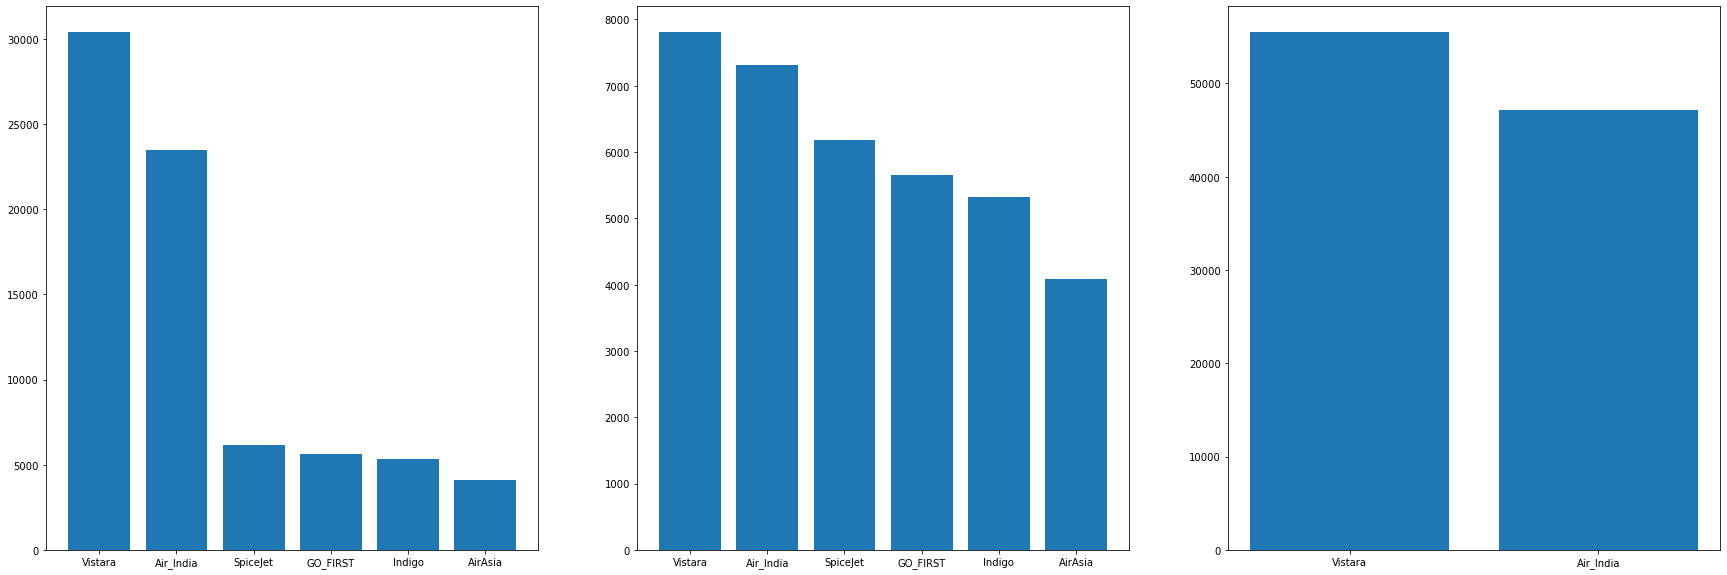

In [11]:
plt.figure(figsize=(30,10))
x = df.groupby(['airline'])['price'].mean().sort_values(ascending = False).keys()
y = df.groupby(['airline'])['price'].mean().sort_values(ascending = False).unique()
plt.subplot(1,3,1)
plt.bar(x,y)

xeco = df[df['class'] == 'Economy'].groupby(['airline'])['price'].mean().sort_values(ascending = False).keys()
yeco = df[df['class'] == 'Economy'].groupby(['airline'])['price'].mean().sort_values(ascending = False).unique()
plt.subplot(1,3,2)
plt.bar(xeco,yeco)

xbus = df[df['class'] == 'Business'].groupby(['airline'])['price'].mean().sort_values(ascending = False).keys()
ybus = df[df['class'] == 'Business'].groupby(['airline'])['price'].mean().sort_values(ascending = False).unique()
plt.subplot(1,3,3)
plt.bar(xbus,ybus)

* AVERAGE PRICE BY SOURCE CITY (ECONOMY AND BUSINESS)

<BarContainer object of 6 artists>

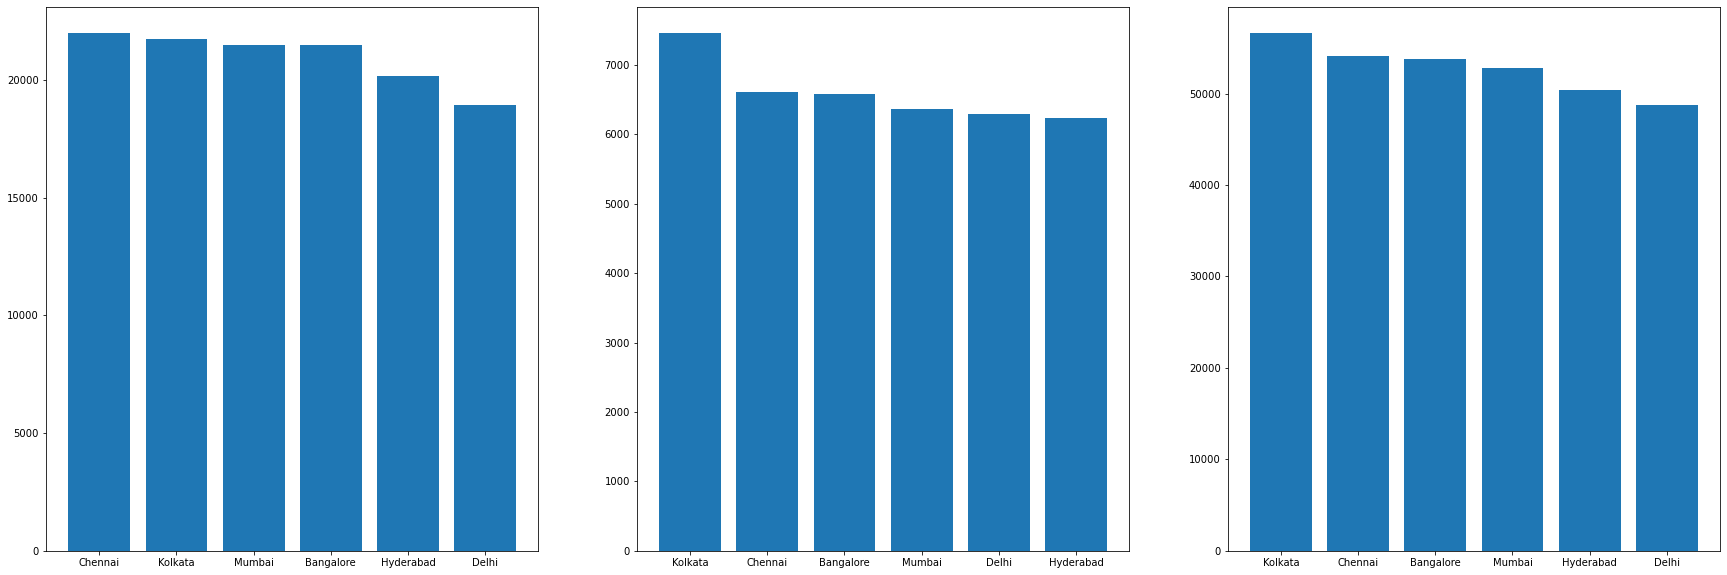

In [12]:
plt.figure(figsize=(30,10))
x = df.groupby(['source_city'])['price'].mean().sort_values(ascending = False).keys()
y = df.groupby(['source_city'])['price'].mean().sort_values(ascending = False).unique()
plt.subplot(1,3,1)
plt.bar(x,y)

xeco = df[df['class'] == 'Economy'].groupby(['source_city'])['price'].mean().sort_values(ascending = False).keys()
yeco = df[df['class'] == 'Economy'].groupby(['source_city'])['price'].mean().sort_values(ascending = False).unique()
plt.subplot(1,3,2)
plt.bar(xeco,yeco)

xbus = df[df['class'] == 'Business'].groupby(['source_city'])['price'].mean().sort_values(ascending = False).keys()
ybus = df[df['class'] == 'Business'].groupby(['source_city'])['price'].mean().sort_values(ascending = False).unique()
plt.subplot(1,3,3)
plt.bar(xbus,ybus)

* AVERAGE PRICE BY DESTINATION CITY (BOTH CLASS)

<BarContainer object of 6 artists>

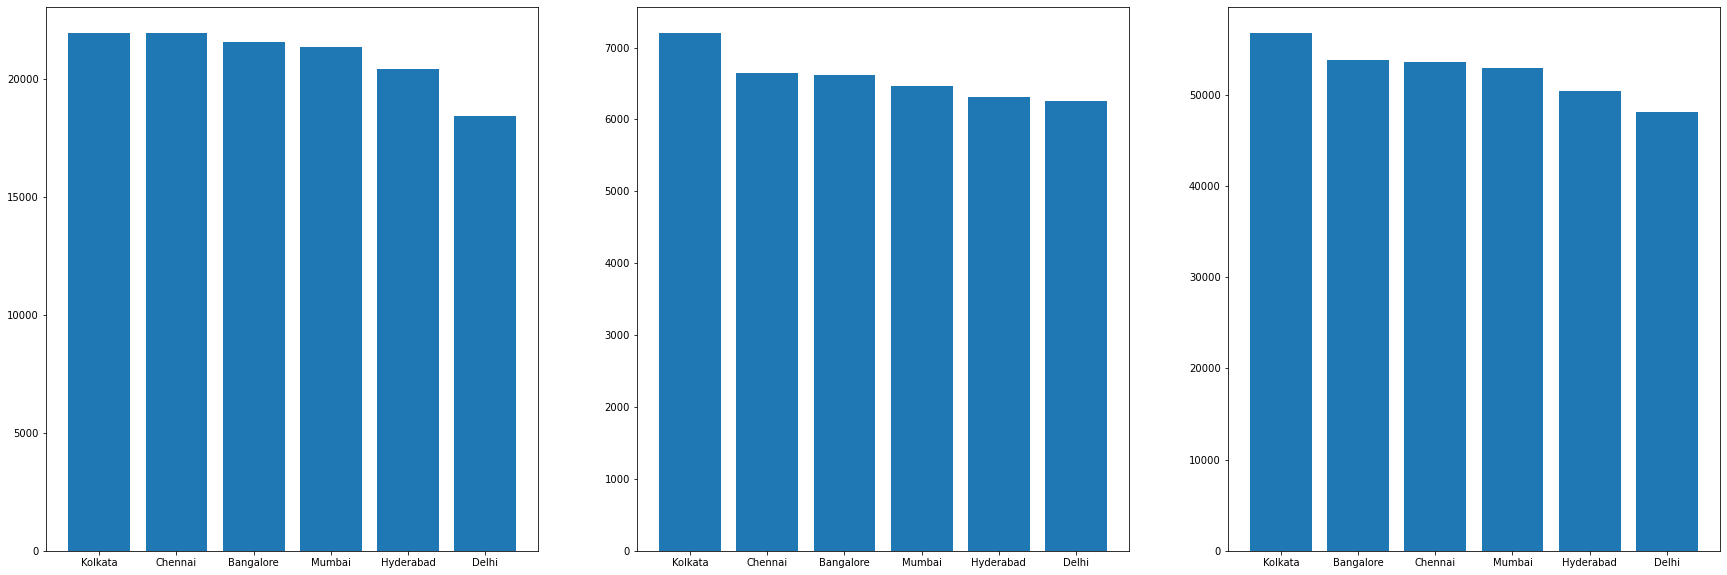

In [13]:
plt.figure(figsize=(30,10))
x = df.groupby(['destination_city'])['price'].mean().sort_values(ascending = False).keys()
y = df.groupby(['destination_city'])['price'].mean().sort_values(ascending = False).unique()
plt.subplot(1,3,1)
plt.bar(x,y)

xeco = df[df['class'] == 'Economy'].groupby(['destination_city'])['price'].mean().sort_values(ascending = False).keys()
yeco = df[df['class'] == 'Economy'].groupby(['destination_city'])['price'].mean().sort_values(ascending = False).unique()
plt.subplot(1,3,2)
plt.bar(xeco,yeco)

xbus = df[df['class'] == 'Business'].groupby(['destination_city'])['price'].mean().sort_values(ascending = False).keys()
ybus = df[df['class'] == 'Business'].groupby(['destination_city'])['price'].mean().sort_values(ascending = False).unique()
plt.subplot(1,3,3)
plt.bar(xbus,ybus)

* AVERAGE PRICE BY DEPARTURE TIME (BOTH)

<BarContainer object of 6 artists>

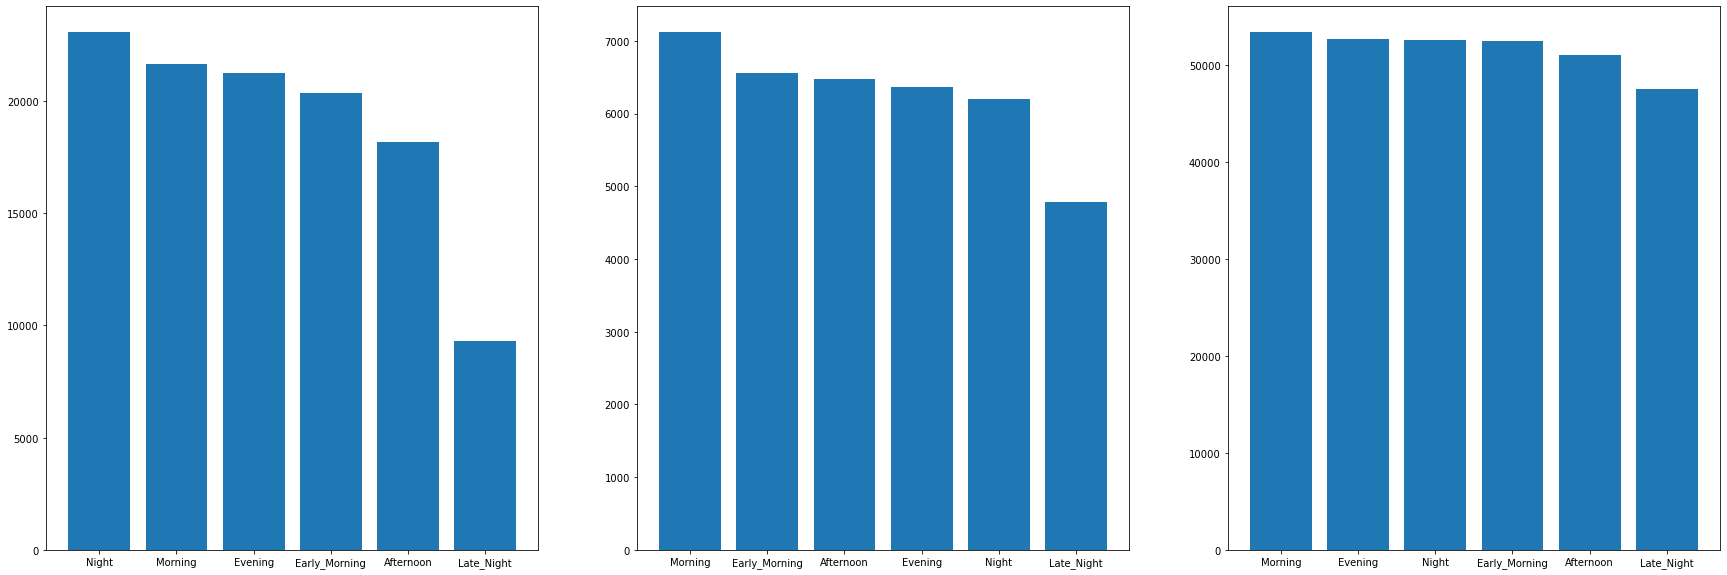

In [14]:
plt.figure(figsize=(30,10))
x = df.groupby(['departure_time'])['price'].mean().sort_values(ascending = False).keys()
y = df.groupby(['departure_time'])['price'].mean().sort_values(ascending = False).unique()
plt.subplot(1,3,1)
plt.bar(x,y)

xeco = df[df['class'] == 'Economy'].groupby(['departure_time'])['price'].mean().sort_values(ascending = False).keys()
yeco = df[df['class'] == 'Economy'].groupby(['departure_time'])['price'].mean().sort_values(ascending = False).unique()
plt.subplot(1,3,2)
plt.bar(xeco,yeco)

xbus = df[df['class'] == 'Business'].groupby(['departure_time'])['price'].mean().sort_values(ascending = False).keys()
ybus = df[df['class'] == 'Business'].groupby(['departure_time'])['price'].mean().sort_values(ascending = False).unique()
plt.subplot(1,3,3)
plt.bar(xbus,ybus)

* AVERAGE PRICE BY DEPARTURE TIME (BUSSINESS)

<BarContainer object of 3 artists>

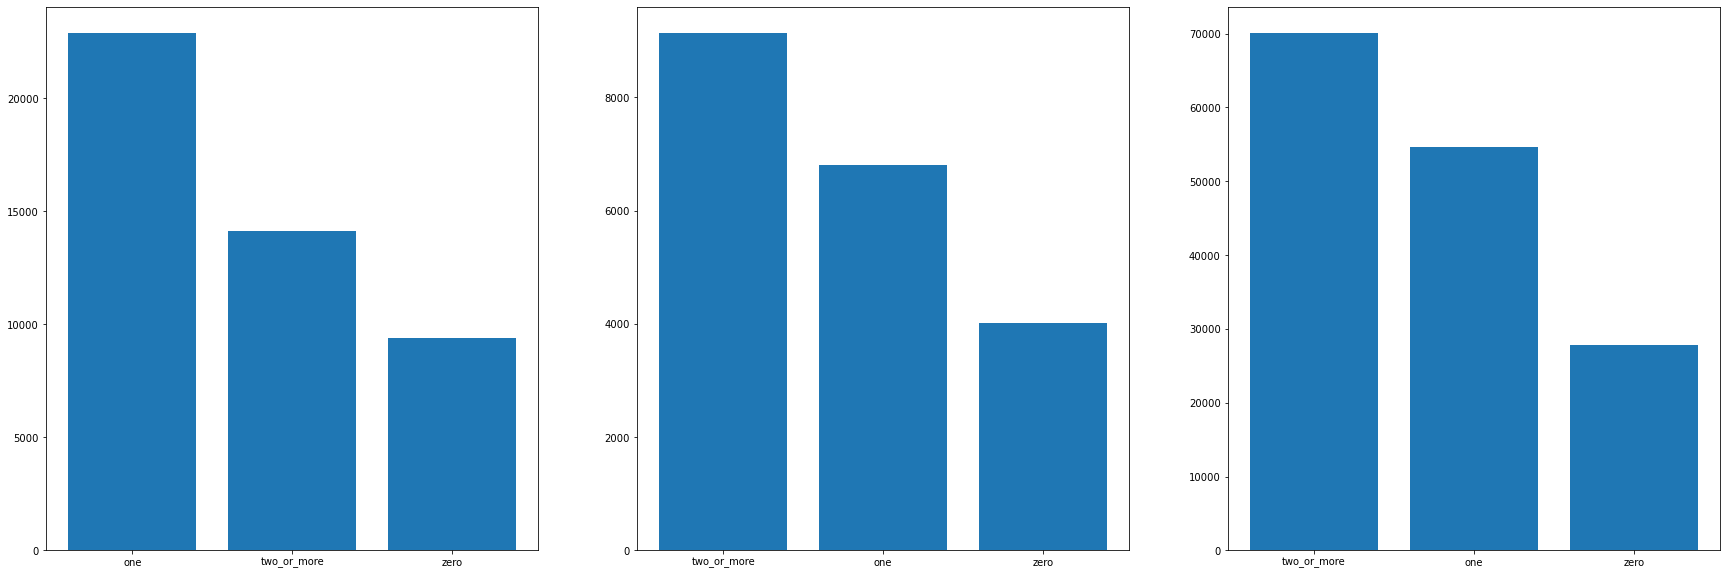

In [15]:
plt.figure(figsize=(30,10))
x = df.groupby(["stops"])['price'].mean().sort_values(ascending=False).keys()
y = df.groupby(["stops"])['price'].mean().sort_values(ascending=False).unique()
plt.subplot(1,3,1)
plt.bar(x,y)

xeco = df[df['class'] == 'Economy'].groupby(['stops'])['price'].mean().sort_values(ascending=False).keys()
yeco = df[df['class'] == 'Economy'].groupby(['stops'])['price'].mean().sort_values(ascending=False).unique()
plt.subplot(1,3,2)
plt.bar(xeco,yeco)

xbus = df[df['class'] == 'Business'].groupby(['stops'])['price'].mean().sort_values(ascending=False).keys()
ybus = df[df['class'] == 'Business'].groupby(['stops'])['price'].mean().sort_values(ascending=False).unique()
plt.subplot(1,3,3)
plt.bar(xbus,ybus)

* AVERAGE PRICE BY DAYS LEFT (ECONONMY)

<AxesSubplot:xlabel='days_left'>

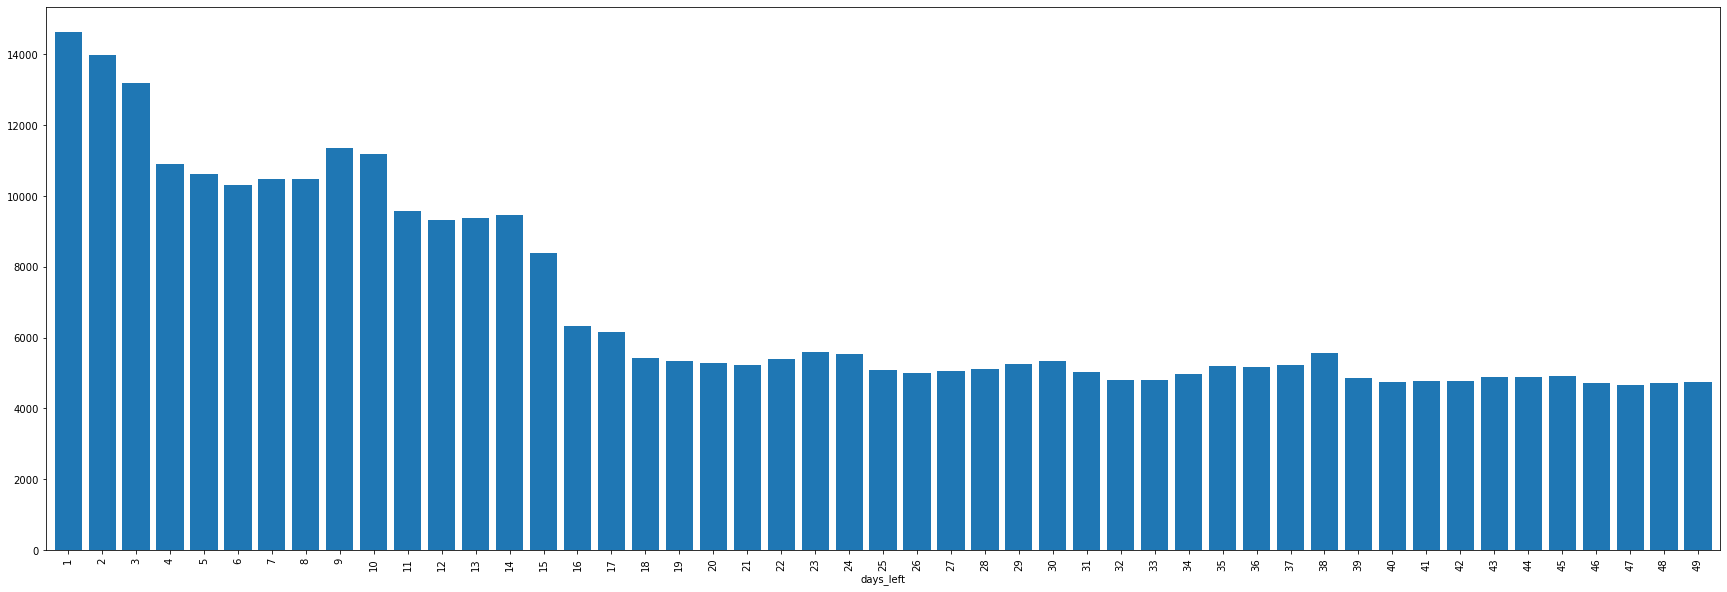

In [16]:
plt.figure(figsize=(30,10))
df[df['class']=='Economy'].groupby(['days_left'])['price'].mean().plot(kind='bar',width=.8)

* AVERAGE PRICE BY DAYS LEFT (BUSINESS)

<AxesSubplot:xlabel='days_left'>

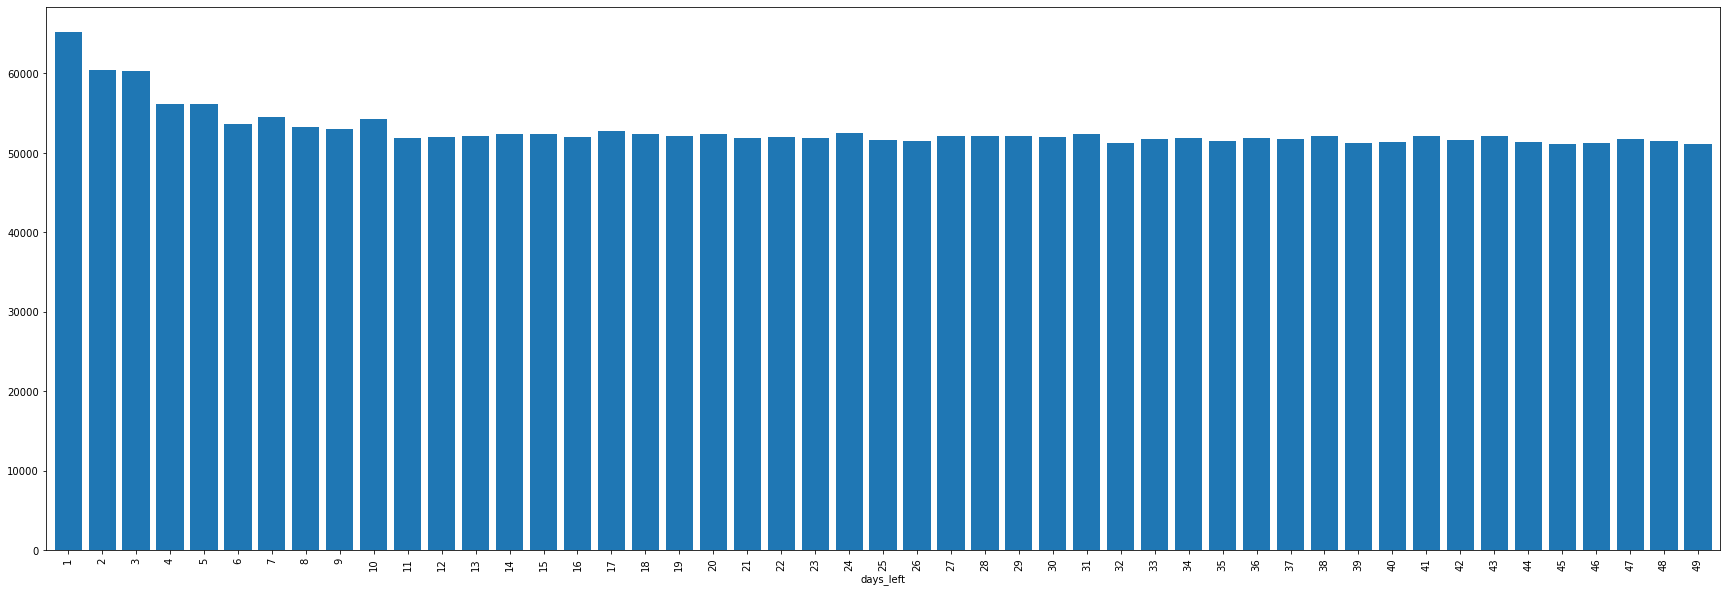

In [17]:
plt.figure(figsize=(30,10))
df[df['class']=='Business'].groupby(['days_left'])['price'].mean().plot(kind='bar',width=.8)

In [18]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [19]:
for i in range(len(df.days_left)):
    if 0< df.days_left[i] <= 3:
        df.days_left[i] = "1-3"
        continue
    elif 3<df.days_left[i] <= 15:
        df.days_left[i] = '4-15'
        continue
    elif 15<df.days_left[i] <= 49:
        df.days_left[i] = "16-49"
        continue

C:\Users\shoba\AppData\Local\Temp\ipykernel_6092\383730471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.days_left[i] = "1-3"


<BarContainer object of 3 artists>

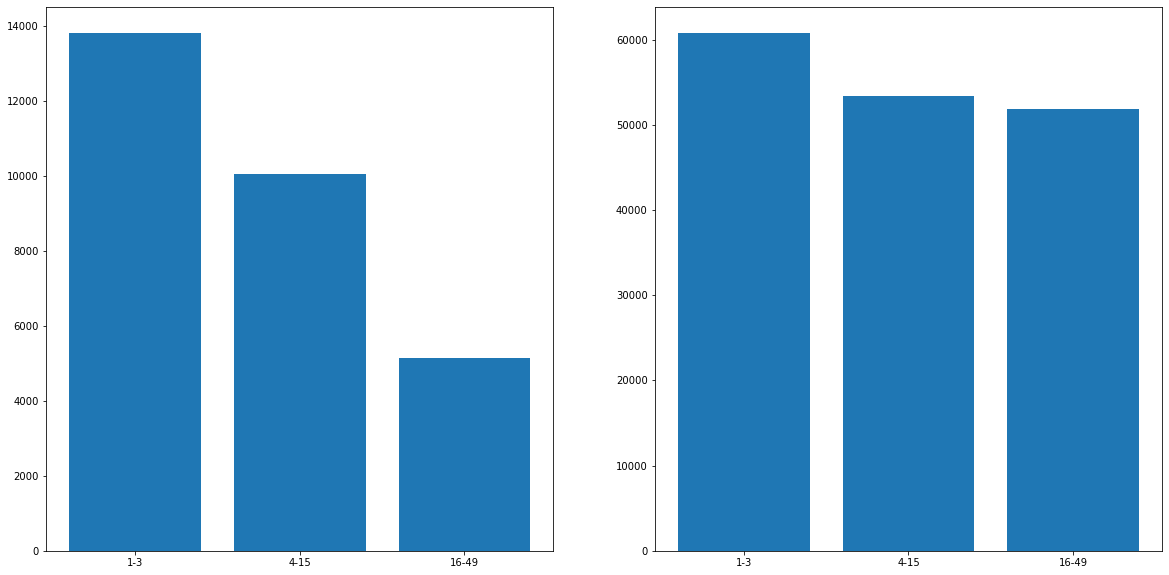

In [20]:
plt.figure(figsize=(20,10))
x = df[df['class']=='Economy'].groupby(['days_left'])['price'].mean().sort_values(ascending=False).keys()
y = df[df['class']=='Economy'].groupby(['days_left'])['price'].mean().sort_values(ascending=False).unique()
plt.subplot(1,2,1)
plt.bar(x,y)

x = df[df['class']=='Business'].groupby(['days_left'])['price'].mean().sort_values(ascending=False).keys()
y = df[df['class']=='Business'].groupby(['days_left'])['price'].mean().sort_values(ascending=False).unique()
plt.subplot(1,2,2)
plt.bar(x,y)

In [21]:
le  = LabelEncoder()

In [22]:
dfcat = df.select_dtypes(exclude=['int64','float64'])
dfnumerical = df.select_dtypes(include=['int64','float64'])

In [23]:
dfcat

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1-3
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1-3
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1-3
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1-3
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,1-3
...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,16-49
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,16-49
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,16-49
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,16-49


In [24]:
dfcat = dfcat.apply(LabelEncoder().fit_transform)

In [25]:
df1 = pd.concat([dfcat,dfnumerical],axis=1)

In [26]:
df1

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,duration,price
0,4,1408,2,2,2,5,5,1,0,2.17,5953
1,4,1387,2,1,2,4,5,1,0,2.33,5953
2,0,1213,2,1,2,1,5,1,0,2.17,5956
3,5,1559,2,4,2,0,5,1,0,2.25,5955
4,5,1549,2,4,2,4,5,1,0,2.33,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,1,10.08,69265
300149,5,1481,1,0,0,5,3,0,1,10.42,77105
300150,5,1486,1,1,0,5,3,0,1,13.83,79099
300151,5,1483,1,1,0,2,3,0,1,10.00,81585


In [27]:
df1.corr()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,duration,price
airline,1.000000,0.637918,-0.028350,0.056885,-0.029838,0.037714,-0.030172,-0.178862,0.027086,-0.001651,0.243358
flight,0.637918,1.000000,-0.009443,0.071564,-0.118833,0.067175,-0.036248,-0.259531,0.021760,0.205502,0.305872
source_city,-0.028350,-0.009443,1.000000,-0.004688,0.001819,0.044153,-0.222935,0.000075,0.001322,0.008619,0.004594
departure_time,0.056885,0.071564,-0.004688,1.000000,-0.008518,-0.046282,-0.001761,-0.053340,0.003371,0.084348,0.058319
stops,-0.029838,-0.118833,0.001819,-0.008518,1.000000,0.010515,-0.012846,0.100262,0.003651,-0.473860,-0.202620
arrival_time,0.037714,0.067175,0.044153,-0.046282,0.010515,1.000000,-0.037431,-0.027647,0.001499,0.008679,0.042043
destination_city,-0.030172,-0.036248,-0.222935,-0.001761,-0.012846,-0.037431,1.000000,0.001603,0.002583,0.001736,0.004795
class,-0.178862,-0.259531,0.000075,-0.053340,0.100262,-0.027647,0.001603,1.000000,-0.016958,-0.138710,-0.937860
days_left,0.027086,0.021760,0.001322,0.003371,0.003651,0.001499,0.002583,-0.016958,1.000000,-0.001049,0.049653
duration,-0.001651,0.205502,0.008619,0.084348,-0.473860,0.008679,0.001736,-0.138710,-0.001049,1.000000,0.204222


<AxesSubplot:>

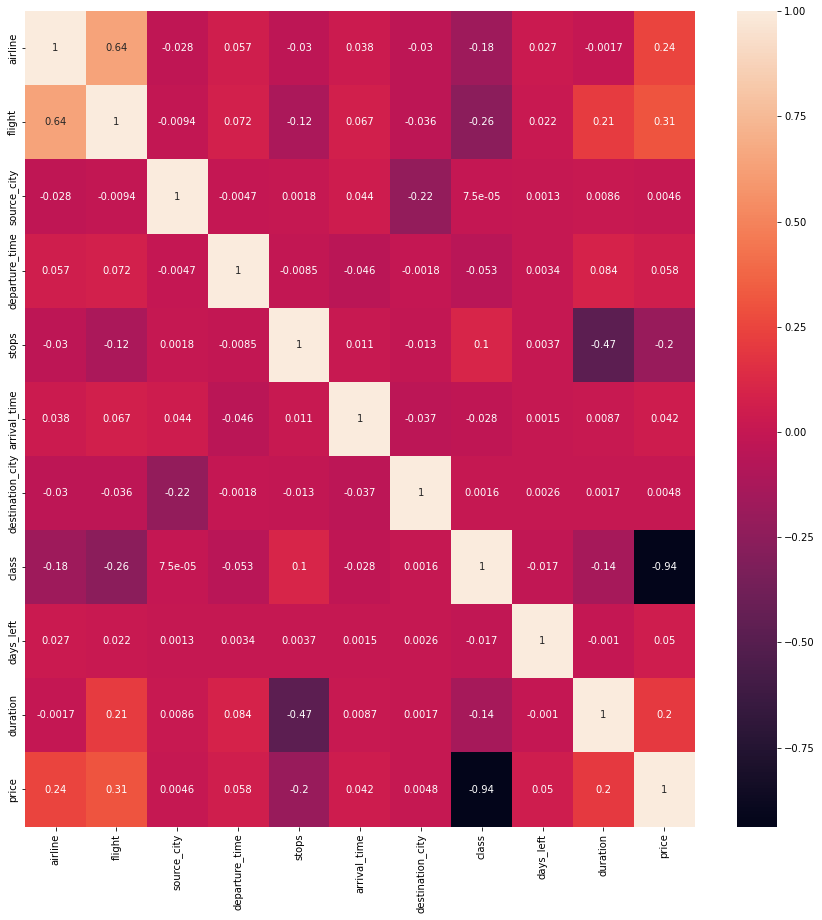

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True)

* SPLITTING DATASET FOR TRAINING AND TESTING

In [29]:
X = df1.drop("price",axis=1)
y = df.price

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [31]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (210107, 10)
The size of training output is (210107,)
The size of testing input is (90046, 10)
The size of testing output is (90046,)


In [33]:
dtr = DecisionTreeRegressor()

In [34]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [35]:
predicted = dtr.predict(X_test)

In [36]:
nd = pd.DataFrame({'actual':y_test,'predicted':predicted})

In [37]:
nd

,actual,predicted
27131,7366,7576.000000
266857,64831,66576.333333
141228,6195,6305.384615
288329,60160,63968.000000
97334,6578,6599.000000
...,...,...
123895,6134,6064.272727
251253,67004,68210.153846
8335,2410,2410.000000
68668,2835,5962.937500


In [38]:
nd.corr()

,actual,predicted
actual,1.000000,0.992433
predicted,0.992433,1.000000


In [40]:
"Decision Tree Regressor Accuracy: ",r2_score(y_test, predicted)

('Decision Tree Regressor Accuracy: ', 0.9849153239824299)